In [1]:
import keras
keras.__version__


'2.4.3'

#### learning word embeddings with `EMBEDDING` layer

In [2]:
from keras.layers import Embedding

# The Embedding layer takes at least two arguments:
# the number of possible tokens, here 1000 (1 + maximum word index),
# and the dimensionality of the embeddings, here 64.
embedding_layer = Embedding(1000, 64)

# good explanation: 
# https://stats.stackexchange.com/questions/270546/how-does-keras-embedding-layer-work

In [7]:
from keras.datasets import imdb
from keras import preprocessing

# Number of words to consider as features
max_features = 10000
# Cut texts after this number of words 
# (among top max_features most common words)
maxlen = 20

# Load the data as lists of integers.
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# This turns our lists of integers
# into a 2D integer tensor of shape `(samples, maxlen)`
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [10]:
x_train

array([[  65,   16,   38, ...,   19,  178,   32],
       [  23,    4, 1690, ...,   16,  145,   95],
       [1352,   13,  191, ...,    7,  129,  113],
       ...,
       [  11, 1818, 7561, ...,    4, 3586,    2],
       [  92,  401,  728, ...,   12,    9,   23],
       [ 764,   40,    4, ...,  204,  131,    9]], dtype=int32)

In [12]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
# We specify the maximum input length to our Embedding layer
# so we can later flatten the embedded inputs
model.add(Embedding(10000, 8, input_length=maxlen))
# After the Embedding layer, 
# our activations have shape `(samples, maxlen, 8)`.


# 8 = output_dimension of the new vector for each word for which embedding layer will be trained
# max_length = max size of each input sentence

# so once the embeddinglayer is trained it creates an output of output * input. Then after fitting the model with this 
# embedding layer, the final shape of the weight matrix will be 
# => number of unique words in the vocab * size of word vector

# https://medium.com/analytics-vidhya/understanding-embedding-layer-in-keras-bbe3ff1327ce

In [13]:
# We flatten the 3D tensor of embeddings 
# into a 2D tensor of shape `(samples, maxlen * 8)`
model.add(Flatten())

# We add the classifier on top
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten (Flatten)            (None, 160)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 1s 810us/step - loss: 0.6704 - acc: 0.6208 - val_loss: 0.6219 - val_acc: 0.6998
Epoch 2/10
625/625 [==============================] - 0s 653us/step - loss: 0.5451 - acc: 0.7501 - val_loss: 0.5266 - val_acc: 0.7304
Epoch 3/10
625/625 [==============================] - 0s 637us/step - loss: 0.4622 - acc: 0.7875 - val_loss: 0.4

In [20]:
# Once the training is completed, embedding layer has learnt the weights which are 
# nothing but the vector representations of each word. Lets check the shape of the weight matrix.

print(model.layers[0].get_weights()[0].shape)

# As we can see from the result of this statement, the shape of the wt matrix of the trained embedding layer is 10000 * 8
# which is consistent with -> 10000 unique words which we fed the model AND 8 being the length of each word vector embedding 

(10000, 8)


### Using pre-trained word embeddings


Download the IMDB data as raw text

First, head to http://ai.stanford.edu/~amaas/data/sentiment/ and download the raw IMDB dataset (if the URL isn't working anymore, just Google "IMDB dataset"). Uncompress it.

Now let's collect the individual training reviews into a list of strings, one string per review, and let's also collect the review labels (positive / negative) into a labels list:



In [21]:
import os


imdb_dir = '/Users/Vaibhav_Beohar/Documents/VB_Mck_Docs/Other Trainings/deeplearning_fchollet_examples/data_samples/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [54]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100  # We will cut reviews after 100 words
training_samples = 200  # We will be training on 200 samples
validation_samples = 10000  # We will be validating on 10000 samples
max_words = 10000  # We will only consider the top 10,000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)

In [55]:
sequences = tokenizer.texts_to_sequences(texts) # token each movie review into numbers. since we cut movie reviews 
                        # to first 100 words only, hence the length of each sequence shouldnt exceed 100

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 88582 unique tokens.


In [62]:
print(len(sequences))
print(sequences[0])
print(len(sequences[0]))

25000
[777, 16, 28, 4, 1, 115, 2278, 6887, 11, 19, 1025, 5, 27, 5, 42, 2425, 1861, 128, 2270, 5, 3, 6985, 308, 7, 7, 3383, 2373, 1, 19, 36, 463, 3169, 2, 222, 3, 1016, 174, 20, 49, 808]
40


In [59]:
#another example of how tokenzier works
sequences_test = tokenizer.texts_to_sequences(["physics is nice"])
print(sequences_test)

[[5699, 6, 324]]


In [63]:

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# Split the data into a training set and a validation set
# But first, shuffle the data, since we started from data
# where sample are ordered (all negative first, then all positive).
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]


Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


#### Download the GloVe word embeddings
Head to https://nlp.stanford.edu/projects/glove/ 
    (where you can learn more about the GloVe algorithm), and download the pre-computed embeddings from 2014 English Wikipedia. It's a 822MB zip file named `glove.6B.zip`, containing `100-dimensional` embedding vectors for 400,000 words (or non-word tokens). Un-zip it.



In [64]:
glove_dir ='/Users/Vaibhav_Beohar/Documents/VB_Mck_Docs/Other Trainings/NLP_learning/UDemy_Lazy_Programmer_DeepLearningNLP/machine_learning_examples/large_files/glove.6B'

In [66]:
embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0] #first column of each row is the actual word
    coefs = np.asarray(values[1:], dtype='float32') #after 1st word, everything else is the word-vector (here 100dim)
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [68]:
embeddings_index.get('the') #sample of how word vector for "the" is stored in the Glove dictionary

array([-0.038194, -0.24487 ,  0.72812 , -0.39961 ,  0.083172,  0.043953,
       -0.39141 ,  0.3344  , -0.57545 ,  0.087459,  0.28787 , -0.06731 ,
        0.30906 , -0.26384 , -0.13231 , -0.20757 ,  0.33395 , -0.33848 ,
       -0.31743 , -0.48336 ,  0.1464  , -0.37304 ,  0.34577 ,  0.052041,
        0.44946 , -0.46971 ,  0.02628 , -0.54155 , -0.15518 , -0.14107 ,
       -0.039722,  0.28277 ,  0.14393 ,  0.23464 , -0.31021 ,  0.086173,
        0.20397 ,  0.52624 ,  0.17164 , -0.082378, -0.71787 , -0.41531 ,
        0.20335 , -0.12763 ,  0.41367 ,  0.55187 ,  0.57908 , -0.33477 ,
       -0.36559 , -0.54857 , -0.062892,  0.26584 ,  0.30205 ,  0.99775 ,
       -0.80481 , -3.0243  ,  0.01254 , -0.36942 ,  2.2167  ,  0.72201 ,
       -0.24978 ,  0.92136 ,  0.034514,  0.46745 ,  1.1079  , -0.19358 ,
       -0.074575,  0.23353 , -0.052062, -0.22044 ,  0.057162, -0.15806 ,
       -0.30798 , -0.41625 ,  0.37972 ,  0.15006 , -0.53212 , -0.2055  ,
       -1.2526  ,  0.071624,  0.70565 ,  0.49744 , 

In [69]:
word_index

{'the': 1,
 'and': 2,
 'a': 3,
 'of': 4,
 'to': 5,
 'is': 6,
 'br': 7,
 'in': 8,
 'it': 9,
 'i': 10,
 'this': 11,
 'that': 12,
 'was': 13,
 'as': 14,
 'for': 15,
 'with': 16,
 'movie': 17,
 'but': 18,
 'film': 19,
 'on': 20,
 'not': 21,
 'you': 22,
 'are': 23,
 'his': 24,
 'have': 25,
 'he': 26,
 'be': 27,
 'one': 28,
 'all': 29,
 'at': 30,
 'by': 31,
 'an': 32,
 'they': 33,
 'who': 34,
 'so': 35,
 'from': 36,
 'like': 37,
 'her': 38,
 'or': 39,
 'just': 40,
 'about': 41,
 "it's": 42,
 'out': 43,
 'has': 44,
 'if': 45,
 'some': 46,
 'there': 47,
 'what': 48,
 'good': 49,
 'more': 50,
 'when': 51,
 'very': 52,
 'up': 53,
 'no': 54,
 'time': 55,
 'she': 56,
 'even': 57,
 'my': 58,
 'would': 59,
 'which': 60,
 'only': 61,
 'story': 62,
 'really': 63,
 'see': 64,
 'their': 65,
 'had': 66,
 'can': 67,
 'were': 68,
 'me': 69,
 'well': 70,
 'than': 71,
 'we': 72,
 'much': 73,
 'been': 74,
 'bad': 75,
 'get': 76,
 'will': 77,
 'do': 78,
 'also': 79,
 'into': 80,
 'people': 81,
 'other': 82,
 '

### Below is very important step in constructing an embedding matrix for our model embedding layer

In [71]:
embedding_dim = 100

#max_words -> total words in dict, embed_dim -> output from embedding layer
embedding_matrix = np.zeros((max_words, embedding_dim))  
for word, i in word_index.items():  #word_index is the total tokenized words in our training dataset (imdb)
    embedding_vector = embeddings_index.get(word) #getting glove vectors for all training dataset words 
    if i < max_words:   #we are only interested in up to a max 10000. We know that each word is represented by it's 
                        #unique index in the dictionary. so we have to skip words that have index > 10000 to make sure
                        #we dont inadvertently accept anything beyond 10000 words. 
        if embedding_vector is not None:    #Here we check if the vector for the corresponding word is indeed present
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

In [72]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


#### Load the GloVe embeddings in the model

The Embedding layer has a single weight matrix: a 2D float matrix where each entry i is the word vector meant to be associated with index i. Simple enough. Let's just load the GloVe matrix we prepared into our Embedding layer, the first layer in our model:


Basically, we are loading the embedding matrix constructed in two steps above to the model we created above. 


The embedding layer has the same format -> `[total max words, total output vector size, total input sentence size]`


In [74]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False # we freeze the embedding layer (we set its trainable attribute to False)

Additionally, we freeze the embedding layer (we set its trainable attribute to False), following the same rationale as what you are already familiar with in the context of pre-trained convnet features: when parts of a model are pre-trained (like our Embedding layer), and parts are randomly initialized (like our classifier), the pre-trained parts should not be updated during training to avoid forgetting what they already know. The large gradient update triggered by the randomly initialized layers would be very disruptive to the already learned features.

#### Train and evaluate

In [75]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

Epoch 1/10
7/7 [==============================] - 0s 40ms/step - loss: 1.5413 - acc: 0.5450 - val_loss: 0.7620 - val_acc: 0.5026
Epoch 2/10
7/7 [==============================] - 0s 28ms/step - loss: 0.7196 - acc: 0.6300 - val_loss: 0.6931 - val_acc: 0.5138
Epoch 3/10
7/7 [==============================] - 0s 27ms/step - loss: 0.5960 - acc: 0.7750 - val_loss: 1.3754 - val_acc: 0.5025
Epoch 4/10
7/7 [==============================] - 0s 29ms/step - loss: 0.5551 - acc: 0.7300 - val_loss: 0.7372 - val_acc: 0.5186
Epoch 5/10
7/7 [==============================] - 0s 28ms/step - loss: 0.2614 - acc: 0.9050 - val_loss: 0.7187 - val_acc: 0.5537
Epoch 6/10
7/7 [==============================] - 0s 28ms/step - loss: 0.3318 - acc: 0.8550 - val_loss: 0.7102 - val_acc: 0.5643
Epoch 7/10
7/7 [==============================] - 0s 27ms/step - loss: 0.1656 - acc: 0.9550 - val_loss: 0.7516 - val_acc: 0.5521
Epoch 8/10
7/7 [==============================] - 0s 28ms/step - loss: 0.0534 - acc: 1.0000 - val

##### Plot performance

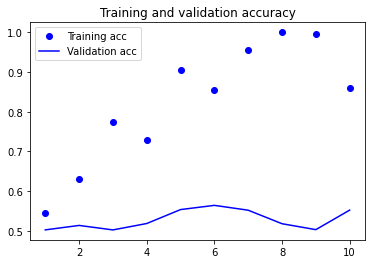

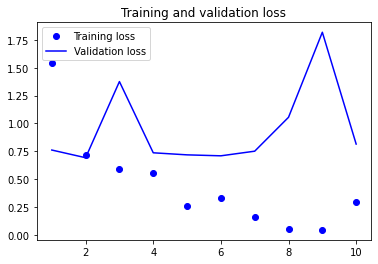

In [76]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

The model quickly starts overfitting, unsurprisingly given the small number of training samples. Validation accuracy has high variance for the same reason, but seems to reach high 50s.

Note that your mileage may vary: since we have so few training samples, performance is heavily dependent on which exact 200 samples we picked, and we picked them at random. If it worked really poorly for you, try picking a different random set of 200 samples, just for the sake of the exercise (in real life you don't get to pick your training data).

##### Further concluding exercises on test data and NOT using a pretrained word embedding matrix (i..e using a task specific word embedding matrix - which generally gives a better performance) -- are present on the F Chollet book github link 

https://nbviewer.jupyter.org/github/fchollet/deep-learning-with-python-notebooks/blob/master/6.1-using-word-embeddings.ipynb

In any case - We get an appalling test accuracy of 54%. 

###### Working with just a handful of training samples is hard!

